In this homework project, we'll build a model for predicting if we have an image of a dino or a dragon. For this, we will use the "Dino or Dragon?"

The dataset was sourced from kaggle.....

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# importing the libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# loading tensorflow and keras
import tensorflow as tf
from tensorflow import keras

# importing the keras image loading module
from tensorflow.keras.preprocessing.image import load_img

%matplotlib inline

In [3]:
## This cell contains the frameworks for building the model from scratch

##### Importing Sequential #######

from keras.models import Sequential
# This gets our neural network as sequential network.
# Note: it can be sequential layers or graph

##### Import 2D convolution layers ######

from keras.layers import Conv2D
# Since we are working with images, all the images are basically 2D
# One can go with the 3D if working with videos

##### Importing Maxpooling2D ####

from keras.layers import MaxPooling2D
# Note: we have Average Pooling, Sum Pooling, and Max Pooling 
# But for this project, I will be choosing MaxPooling 

##### Importing flatten #####

from keras.layers import Flatten
# This fasten the process of converting all the resultant 2D arrays as single long continuous linear vector 

##### Impoting Dense #####

from keras.layers import Dense
# This connect networks (vector representation) to the output (prediction)

##### Importing image preprocessing #### 
from keras.preprocessing.image import ImageDataGenerator


In [4]:
##### Setting up the model learning frameworks ######

##### here, I will consider model convolution, pooling, and flattening

### Initialize the Convolution Neural Networks 

model_clf = Sequential()

### Setting up the convolution framework
##### Arguements ######
# 1. filter ==> 32
# 2. size of filters (kernel size) ==> (3, 3)
# 3. activation function ==> 'relu'
# 4. input image resolution ==> (150, 150, 3)

model_clf.add(Conv2D(32, (3, 3), input_shape = (150, 150, 3), activation = 'relu'))


### Setting the Pooling 
##### Arguements ######
# 1. We are choosing maxpooling 
# 2. Making the pooling size to be ==> (2, 2)

model_clf.add(MaxPooling2D(pool_size = (2, 2)))

##### Flatten the networks
# converting the pooled image pixels to a one dimensional single vector representation

model_clf.add(Flatten())

########## Creating Dense Layers Frameworks #################

### Dense layers (first layer)
###### Arguements #####
# 1. neurons ==> 64
# 2. activation function ==> 'relu'

model_clf.add(Dense(units = 64, activation = 'relu'))

### Dense layers (last layer) ==> Output Dense ####
###### Arguements #####
# 1. neurons ==> 1 (since it's binary classification)
# 2. activation function ==> 'sigmoid'

model_clf.add(Dense(units = 1, activation = 'sigmoid'))


######## Compilng the model frameworks ######

#### Setting the optimizer 
# I will be using SDG with;
# learning rate ==> 0.002
# momentum ==> 0.8


learning_rate = 0.002
momentum = 0.8
optimizer = keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum)


##### Setting the loss function
# since the project problem is binary classification, 
# I will be using Binary Cross entropy

loss = keras.losses.BinaryCrossentropy()

# compiling the model
model_clf.compile(optimizer=optimizer, 
                  loss=loss, 
                  metrics=['accuracy'])

In [5]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 64)                11214912  
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11,215,873
Trainable params: 11,215,873
Non-trainable params: 0
____________________________________________

Setting up the Data generator and Training 

In [6]:
#### Training data generator ########

train_gen = ImageDataGenerator(rescale=1./255)

train_ds = train_gen.flow_from_directory('/content/drive/MyDrive/7. Neural_Networks_&_Deep_Learning/homework/train',
                                         target_size=(150, 150), 
                                         batch_size=20,
                                         shuffle=True)

#### Testing data generator ########

test_gen = ImageDataGenerator(rescale=1./255)

test_ds = test_gen.flow_from_directory('/content/drive/MyDrive/7. Neural_Networks_&_Deep_Learning/homework/test',
                                         target_size=(150, 150), 
                                         batch_size=20,
                                         shuffle=True)

Found 1617 images belonging to 2 classes.
Found 394 images belonging to 2 classes.


In [7]:
train_ds.class_mode, test_ds.class_mode

('categorical', 'categorical')

In [8]:
train_ds.class_indices

{'dino': 0, 'dragon': 1}

In [11]:
# track histories across training sessions
histories = []
histories.append(
    model_clf.fit(train_ds, epochs=10, validation_data=test_ds, 
                  callbacks=[keras.callbacks.CSVLogger('history.csv')])
    )

Epoch 1/10
81/81 [==============================] - 942s 12s/step - loss: 0.6935 - accuracy: 0.5000 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 2/10
81/81 [==============================] - 13s 160ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 3/10
81/81 [==============================] - 11s 142ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 4/10
81/81 [==============================] - 11s 141ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 5/10
81/81 [==============================] - 12s 146ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/10
81/81 [==============================] - 13s 158ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/10
81/81 [==============================] - 11s 142ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [12]:
def plot_histories(histories):
    plt.clf()
    accuracy = []
    for history in histories:
        for val_accuracy in history.history['val_accuracy']:
          accuracy.append(val_accuracy)
    epochs = range(1, len(accuracy) + 1)

    plt.plot(epochs, accuracy, 'b', label='Test Accuracy')
    plt.xlabel('Epochs')
    plt.title('Test Accuracy')
    plt.legend()
    plt.show()

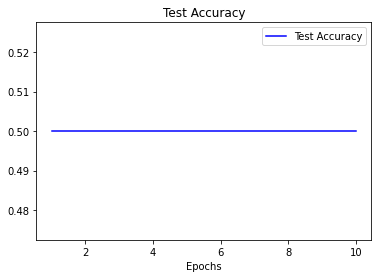

In [13]:
# plotting 
plot_histories(histories)


In [14]:
hist_df1 = pd.read_csv('/content/history.csv')
hist_df1

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.5,0.693512,0.5,0.693353
1,1,0.5,0.693327,0.5,0.693287
2,2,0.5,0.693288,0.5,0.693263
3,3,0.5,0.693272,0.5,0.693254
4,4,0.5,0.693259,0.5,0.693248
5,5,0.5,0.693250,0.5,0.693243
6,6,0.5,0.693243,0.5,0.693245
7,7,0.5,0.693236,0.5,0.693246
8,8,0.5,0.693231,0.5,0.693236
9,9,0.5,0.693226,0.5,0.693237


In [15]:
hist_df1.accuracy.median()

0.5

In [16]:
hist_df1.loss.std()

8.559013085539303e-05

Data Augumentation

In [17]:
train_gen = ImageDataGenerator(rotation_range=40,
                               width_shift_range=0.2,
                               height_shift_range=0.2,
                               shear_range=0.2,
                               zoom_range=0.2,
                               horizontal_flip=True,
                               fill_mode='nearest')

train_ds = train_gen.flow_from_directory('/content/drive/MyDrive/7. Neural_Networks_&_Deep_Learning/homework/train',
                                         target_size=(150, 150), 
                                         batch_size=20,
                                         shuffle=True)

Found 1617 images belonging to 2 classes.


In [18]:
# continue training
histories.append(
    model_clf.fit(train_ds, epochs=10, validation_data=test_ds, 
                  callbacks=[keras.callbacks.CSVLogger('history2.csv')])
    )

Epoch 1/10
81/81 [==============================] - 18s 228ms/step - loss: 15.4189 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/10
81/81 [==============================] - 19s 240ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/10
81/81 [==============================] - 18s 224ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/10
81/81 [==============================] - 21s 259ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/10
81/81 [==============================] - 18s 227ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/10
81/81 [==============================] - 19s 238ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/10
81/81 [==============================] - 18s 228ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.500

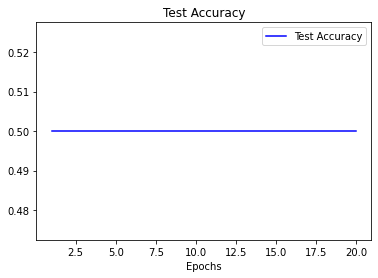

In [19]:
# plotting 
plot_histories(histories)

In [20]:
hist_df2 = pd.read_csv('/content/history2.csv')
hist_df2

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.5,15.418944,0.5,0.693154
1,1,0.5,0.693152,0.5,0.693150
2,2,0.5,0.693157,0.5,0.693149
3,3,0.5,0.693153,0.5,0.693148
4,4,0.5,0.693149,0.5,0.693148
5,5,0.5,0.693173,0.5,0.693147
6,6,0.5,0.693148,0.5,0.693147
7,7,0.5,0.693156,0.5,0.693147
8,8,0.5,0.693150,0.5,0.693147
9,9,0.5,0.693148,0.5,0.693147


In [21]:
hist_df2.val_loss.mean()

0.6931485891342163